<a href="https://colab.research.google.com/github/SughoshDixit/Hotel-Waiter-Tip-Prediction-Using-Locally-Weighted-Regression/blob/main/ML_Group_137_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-family:verdana;"> <center>📚 Machine Learning Assignment - 2 Group 137📚</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Tip Prediction</center></p>
<p><center style="color:#159364; font-family:cursive;">
 <table>
  <tr>
    <th>Name</th>
    <th>Student No</th>
  </tr>
  <tr>
    <td>Sughosh P Dixit</td>
    <td>2021FA04058</td>
  </tr>
</table> 
</p>
***

**Dataset:**
Predict the tip amount given some parameters. 

![Stay Home](https://cdn.dribbble.com/users/1740938/screenshots/8110971/media/0e0a82253a939fa9b629727109a1cb2b.jpg)
<cite>Image from www.dribbble.com by Aditya Shrivastava</cite>

<div style="font-family:verdana; word-spacing:1.5px; color:orange">
    <h1> Part A <br></h1?
    <h2 id="emoji">
        1 Import Libraries/Dataset
        <br>
    </h2>
    <p style="line-height:1.7em; color:orange;">
    <ol>
        <li>
            <b>Download the dataset</b>
        </li>
        <li>
            <b>Import the required datasets</b>
        </li>
    </ol>
</div>

In [ ]:
# The aim of this analysis is to predict tips given set of parameters
# Libraries are loaded first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/tip.csv')

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="emoji">
        2 Data Visualization and Exploration
        <br>
    </h1>
    <p style="line-height:1.7em;">
    <ol>
        <li>
            <b>Print 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</b>
        </li>
        <li>
            <b>Print the description and Basic statistical details.</b>
        </li>
        <li>
            <b>Try exploring the data and see what insights can be drawn from the dataset.</b>
        </li>
    </ol>
</div>

In [ ]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="emoji">
        Insights
        <br>
    </h1>
</div>

![Stay Home](https://cdn.dribbble.com/users/33046/screenshots/13822141/media/ac015f099f6afbbe042e067811e68c5b.png)
<cite>Image from www.dribbble.com by  Cleo Sonski</cite>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h3 id="emoji">
        Data Distribution using Pie Chart
        <br>
    </h3>
</div>

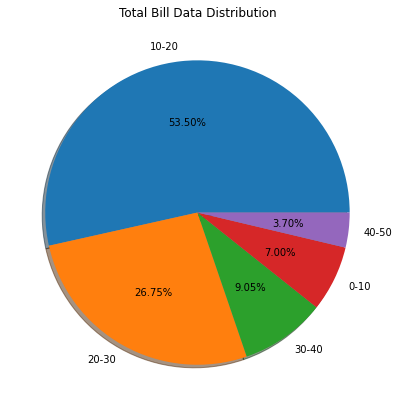

Number of bills in dataset
 10-20    130
20-30     65
30-40     22
0-10      17
40-50      9
Name: bins, dtype: int64


In [ ]:
#Total Bill Data Distribution
df['bins'] = pd.cut(df['total_bill'],bins=[0,10,20,30,40,50], labels=["0-10","10-20","20-30","30-40","40-50"])
count = df['bins'].value_counts()
_per_counts_bill = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_bill.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_bill, labels = labs, autopct = "%.2f%%",shadow=True )
plt.title('Total Bill Data Distribution')
plt.show()
print('Number of bills in dataset\n',count)

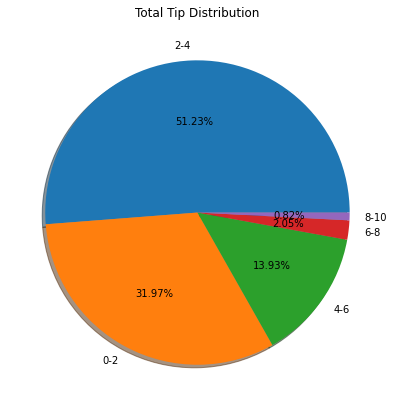

Count of tip range in dataset 
 2-4     125
0-2      78
4-6      34
6-8       5
8-10      2
Name: bins, dtype: int64


In [ ]:
#Tip Data Distribution
df['bins'] = pd.cut(df['tip'],bins=[0,2,4,6,8,10], labels=["0-2","2-4","4-6","6-8","8-10"])
count = df['bins'].value_counts()
_per_counts_tip = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_tip.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_tip, labels = labs, autopct = "%.2f%%",shadow=True )
plt.title('Total Tip Distribution')
plt.show()
print('Count of tip range in dataset \n',count)

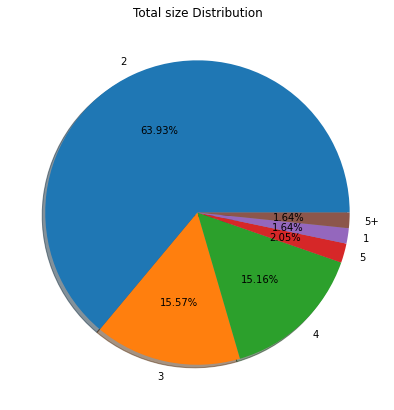

Count of size in dataset 
 2     156
3      38
4      37
5       5
1       4
5+      4
Name: bins, dtype: int64


In [ ]:
#Size Data Distribution
df['bins'] = pd.cut(df['size'],bins=[0,1,2,3,4,5,6], labels=["1","2","3","4","5","5+"])
count = df['bins'].value_counts()
_per_counts_size = df['bins'].value_counts() / len(df.index) * 100
labs = _per_counts_size.index.tolist()
f, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.pie(_per_counts_size, labels = labs, autopct = "%.2f%%",shadow=True )
plt.title('Total size Distribution')
plt.show()
print('Count of size in dataset \n',count)

In [ ]:
df = df.drop(columns='bins')

<div style="font-family:verdana; word-spacing:1.5px;">
    <h3 id="emoji">
        Data Distribution using Bar Chart
        <br>
    </h3>
</div>

Text(0.5, 1.0, 'Count of Male and Female customers')

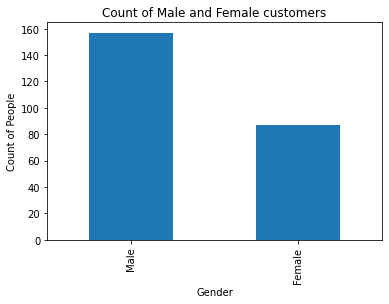

In [ ]:
#Bar graph for sex data distribution

df['sex'].value_counts().plot(kind='bar')

plt.xlabel("Gender")
plt.ylabel("Count of People")
plt.title("Count of Male and Female customers")

Text(0.5, 1.0, 'Count of Smoking customers')

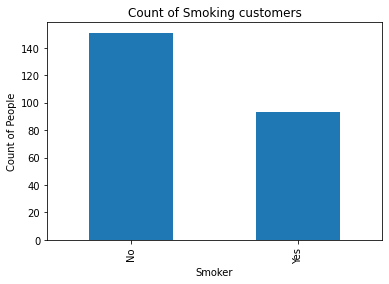

In [ ]:
#Bar graph for sex data distribution

df['smoker'].value_counts().plot(kind='bar')

plt.xlabel("Smoker")
plt.ylabel("Count of People")
plt.title("Count of Smoking customers")

<div style="font-family:verdana; word-spacing:1.5px;">
    <h3 id="emoji">
        Scatter Plots to see relationship between variables
        <br>
    </h3>
</div>

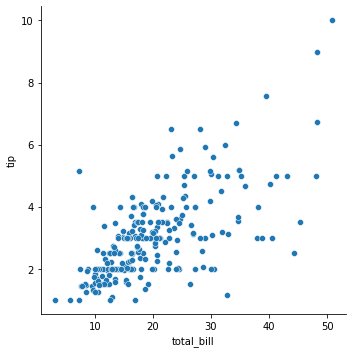

In [ ]:
import seaborn as sb
sb.relplot(x="total_bill", y="tip", data= df)

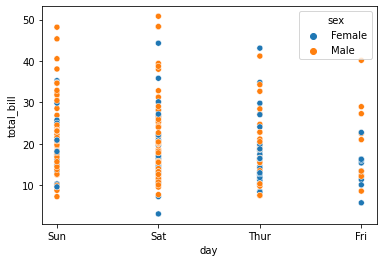

In [ ]:
sb.scatterplot(x="day", y="total_bill", data= df, hue = 'sex')

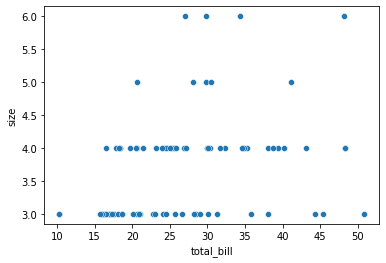

In [ ]:
sb.scatterplot(x='total_bill', y='size', data=df.query('size > 2'))

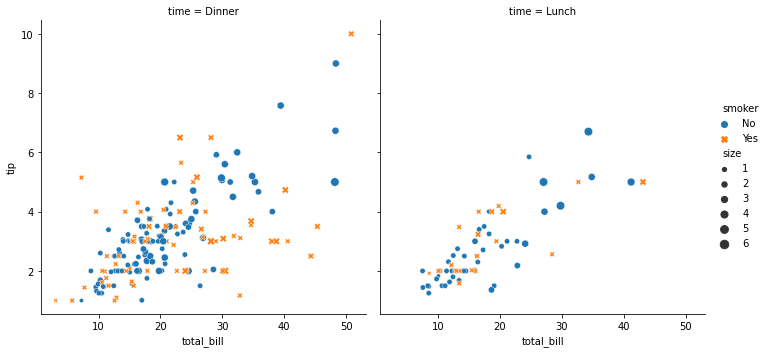

In [ ]:
 # A holistic visualization of the given dataset
sns.relplot(
    data=df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

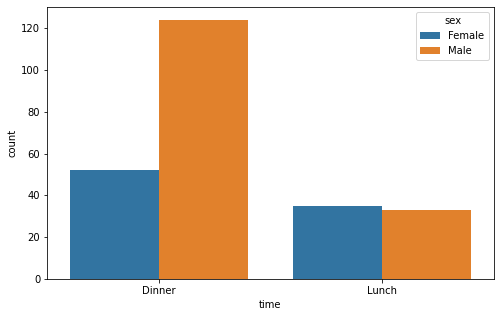

In [ ]:
# count plot: is a graphical display to show the number of occurrences or frequency for each categorical data using bars

plt.figure(figsize=(8,5))
sb.countplot(x = "time", hue = "sex", data=df)

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="emoji">
        3 Data Pre-processing and cleaning
        <br>
    </h1>
    <p style="line-height:1.7em;">
    <ol>
        <li>
            <b>Identify NULL or Missing Values based on column. Apply appropriate feature engineering techniques for them.</b>
        </li>
        <li>
            <b>Do the correlational analysis on the dataset. Provide a visualization for the same.</b>
        </li>
        <li>
            <b>Comment on confounding variables if any.</b>
        </li>
    </ol>
</div>

In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
dummied_data = df.copy()
dummied_data = pd.get_dummies(dummied_data, columns = ['sex', 'smoker', 'day', 'time'])
dummied_data.sample(5)

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
213,13.27,2.5,2,1,0,0,1,0,1,0,0,1,0
159,16.49,2.0,4,0,1,1,0,0,0,1,0,1,0
231,15.69,3.0,3,0,1,0,1,0,1,0,0,1,0
212,48.33,9.0,4,0,1,1,0,0,1,0,0,1,0
26,13.37,2.0,2,0,1,1,0,0,1,0,0,1,0


In [ ]:
## create x and y variable
X = dummied_data.drop(columns='tip')
y = dummied_data['tip']

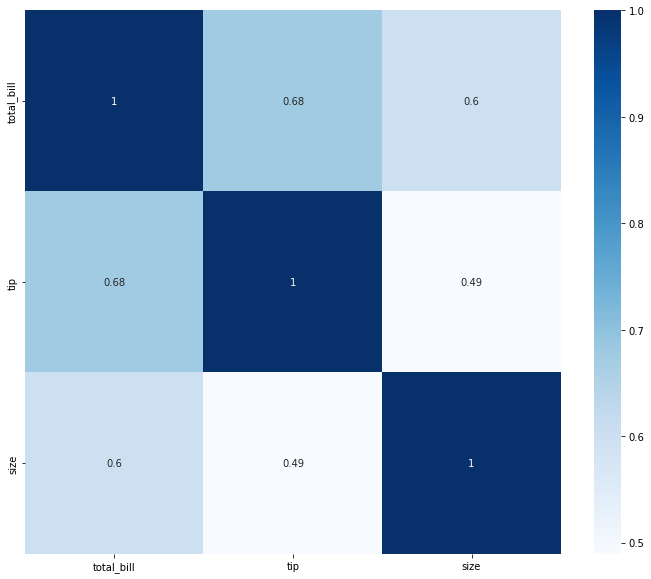

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='Blues')

Confounding Variables observation: A confounding variable is an external influence in an experiment. In other words, these variables affect the output of the model by manipulating dependent and independent variables. Subsequently, confounding variables act on dependent variables, leading to inaccurate results.Here in this case, the smoker and siz edata points are found to be confounding variables.

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1> Part B <br></h1?
    <h2 id="emoji">
        1 Model Building
        <br>
    </h2>
    <p style="line-height:1.7em;">
    <ol>
        <li>
            <b>Perform Model Development using locally weighted regression with appropriate hyper parameters.</b>
        </li>
        <li>
            <b>Train the model and print the appropriate evaluation parameters like R Square/Adjusted R Square, Mean Square Error(MSE)/Root Mean Square Error(RMSE), Mean Absolute Error(MAE).</b>
        </li>
    </ol>
</div>



<div style="font-family:verdana; word-spacing:1.5px;">
    <h3 id="emoji">
         Linear Regression<br>
$ y = \beta_0 + \beta_1 x $ <br>

where X is feature which is independent and y isn target to be predicted which depends on X and $ \beta_0 $ <br>
        <br>
    </h3>
</div>

In [ ]:
## Splitting the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .33, random_state=666)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

0.7823572799020106

In [ ]:
model.coef_

array([ 0.08822353,  0.20310361,  0.09902999, -0.09902999,  0.03670013,
       -0.03670013,  0.11676446, -0.05757366,  0.11513933, -0.17433012,
       -0.07794444,  0.07794444])

Calculation of Appropriate Evaluation Parameters

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
## R2 for Testing Set

r2_test = r2_score(y_test, pred_test)
r2_test

0.45473383906669906

In [ ]:
## Mean Absolute Error for Testing Set

MAE_test = mean_absolute_error(y_test, pred_test)
MAE_test

0.7728172393487371

In [ ]:
## Mean Squared Error for Testing Set

MSE_test = mean_squared_error(y_test, pred_test)
MSE_test



1.1462809292077802

In [ ]:
## Root Mean Squared Error for Testing Set

RMSE_test = np.sqrt(MSE_test)
RMSE_test

1.070645099558103

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1>2 Performance Evaluation <br></h1?
    <p style="line-height:1.7em;">
    <ol>
        <li>
            <b>Do the prediction for the test data and display the results for the inference.</b>
        </li>
        <li>
            <b>Compare the accuracy of train data with test data. Provide appropriate analysis for the same for all cases.</b>
        </li>
        <li>
            <b>Write your observation for result of each question and justify your answer.</b>
        </li>
    </ol>
</div>

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([3.59808525, 2.32893861, 3.97328503, 4.87845846, 2.04037144])

In [ ]:
np.array(y_test[:5])

array([5.  , 2.52, 3.75, 5.  , 1.56])

In [ ]:
np.array(X_test[:5])[:,0]

array([20.69, 12.48, 25.  , 35.26,  9.94])

In [ ]:
X_test[:5]

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
185,20.69,5,0,1,1,0,0,0,1,0,1,0
124,12.48,2,1,0,1,0,0,0,0,1,0,1
157,25.00,4,1,0,1,0,0,0,1,0,1,0
11,35.26,4,1,0,1,0,0,0,1,0,1,0
53,9.94,2,0,1,1,0,0,0,1,0,1,0


In [ ]:
y_test[:5]

185    5.00
124    2.52
157    3.75
11     5.00
53     1.56
Name: tip, dtype: float64


<div style="font-family:verdana; word-spacing:1.5px;">
    <h3 id="emoji">
Error Analysis         
        <br>
    </h3>
</div>

In [ ]:
## Error Analysis

Training_set = pd.concat([X_train, y_train], axis = 1)

In [ ]:
pred_train = model.predict(X_train)

In [ ]:
## Top 10 Biggest Error on Training Set

Training_set['tip_pred'] = pred_train
Training_set['Error'] = abs(Training_set['tip'] - Training_set['tip_pred'])
Training_set.sort_values('Error', ascending=False).head(10)

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip,tip_pred,Error
170,50.81,3,0,1,0,1,0,1,0,0,1,0,10.00,5.603058,4.396942
183,23.17,4,0,1,0,1,0,0,1,0,1,0,6.50,3.540376,2.959624
102,44.30,3,1,0,0,1,0,1,0,0,1,0,2.50,5.226782,2.726782
214,28.17,3,1,0,0,1,0,1,0,0,1,0,6.50,3.803737,2.696263
237,32.83,2,0,1,0,1,0,1,0,0,1,0,1.17,3.813695,2.643695
88,24.71,2,0,1,1,0,0,0,0,1,0,1,5.85,3.209852,2.640148
57,26.41,2,1,0,1,0,0,1,0,0,1,0,1.50,3.518760,2.018760
46,22.23,2,0,1,1,0,0,0,1,0,1,0,5.00,3.124639,1.875361
178,9.60,2,1,0,0,1,0,0,1,0,1,0,4.00,2.135035,1.864965
48,28.55,3,0,1,1,0,0,0,1,0,1,0,2.05,3.885315,1.835315


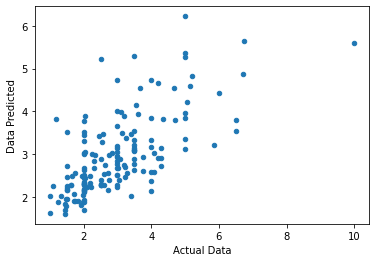

In [ ]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel('Actual Data')
plt.ylabel('Data Predicted')
plt.show()

<Figure size 720x864 with 0 Axes>

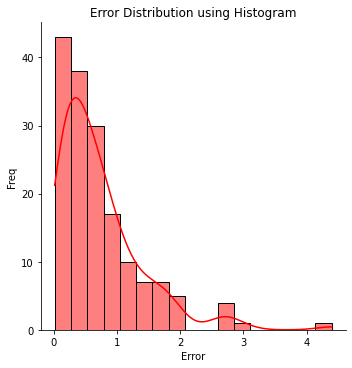

In [ ]:
## Visualization of Error using Histogram

plt.figure(figsize=(10,12))
sns.displot(Training_set['Error'], kde=True,
color='red')
plt.title('Error Distribution using Histogram')
plt.ylabel('Freq')
plt.show()

## We can see that the error distribution is positively skewed.



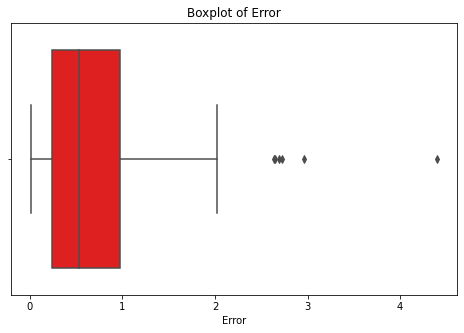

In [ ]:
## Visualization of Error using boxplot

plt.figure(figsize=(8,5))
sns.boxplot(Training_set['Error'], color='red')
plt.title('Boxplot of Error')
plt.show()

## The boxplot show us that the error above 2.0, is an outlier.



Based on the distribution of Error, we expect that the model will have a low score.


Error Analysis of Training Set

In [ ]:
pred_train = model.predict(X_train)

In [ ]:
#R2 Score for Training Set

r2_train = r2_score(y_train, pred_train)
r2_train

0.4683104755963512

In [ ]:
## Mean Absolute Error for Training Set

MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

0.7163121041560331

In [ ]:
## Mean Squared Error for Training Set

MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

0.9589277582238608

In [ ]:
## Root Mean Squared Error for Training Set

RMSE_train = np.sqrt(MSE_train)
RMSE_train

0.9792485681500182

In [ ]:
EvalScore = {
    'Training' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing' : [r2_test, MAE_test, MSE_test, RMSE_test]
}

Evaldf = pd.DataFrame(EvalScore, index=['R Squared', 'MAE', 'MSE', 'RMSE'])
Evaldf

,Training,Testing
R Squared,0.468310,0.454734
MAE,0.716312,0.772817
MSE,0.958928,1.146281
RMSE,0.979249,1.070645
